In [1]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import warnings; warnings.simplefilter('ignore')

## NIFTY 50

In [119]:
df = pd.read_csv('NIFTY 50.csv')

In [120]:
df=df.dropna(axis=0)

In [121]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index(["Date"])
df.head()

,Close,LN Returns,Volatility
Date,,,
1991-01-03,314.01,-0.015610,0.000244
1991-01-07,318.12,0.013004,0.000169
1991-01-09,321.49,0.010538,0.000111
1991-01-11,326.37,0.015065,0.000227
1991-01-14,323.42,-0.009080,0.000082


In [122]:
series = df['Volatility']
series.head()

Date
1991-01-03    0.000244
1991-01-07    0.000169
1991-01-09    0.000111
1991-01-11    0.000227
1991-01-14    0.000082
Name: Volatility, dtype: float64

In [123]:
from arch import arch_model

am = arch_model(series, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(update_freq=5)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -43571.37898079198
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [124]:
df[df.index>'2014-04-09']

,Close,LN Returns,Volatility
Date,,,
2014-04-10,6796.40,0.000029,8.643600e-10
2014-04-11,6776.30,-0.002962,8.772440e-06
2014-04-15,6733.10,-0.006396,4.090330e-05
2014-04-16,6675.30,-0.008622,7.433050e-05
2014-04-17,6779.40,0.015474,2.394590e-04
...,...,...,...
2019-12-24,12214.55,-0.003938,1.551060e-05
2019-12-26,12126.55,-0.007231,5.228160e-05
2019-12-27,12245.80,0.009786,9.576100e-05


In [125]:
import sys

index = series.index
start_loc = 0
end_loc = np.where(index >= '2014-04-09')[0].min()
forecasts = {}
for i in range(1409):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


....

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned co

limit_output extension: Maximum message size of 10000 exceeded with 10375 characters

In [126]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                35468.9
Distribution:                  Normal   AIC:                          -70929.7
Method:            Maximum Likelihood   BIC:                          -70903.2
                                        No. Observations:                 5637
Date:                Tue, Apr 28 2020   Df Residuals:                     5633
Time:                        21:59:29   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.1618e-04  6.392e-08   3381.968      0.000 [2.161e-04,2.163e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.3552e-09  2.107e-12   4441.095      0.000 [9.351e-09,9.359e-09]
alpha[1]       0.1000  2.170e-02      4.608  4.061e-06   [5.747e-02,  0.143]
beta[1]        0.8800  2.430e-02     36.211 4.098e-287     [  0.832,  0.928]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [127]:
t=pd.DataFrame(forecasts).T

In [128]:
test=df[df.index>'2014-04-09']

In [129]:
t

,h.1
2014-04-07,1.840108e-07
2014-04-09,1.773260e-07
2014-04-10,1.793684e-07
2014-04-11,2.237264e-02
2014-04-15,1.801111e-07
...,...
2019-12-20,1.082845e-07
2019-12-23,1.092775e-07
2019-12-24,1.095453e-07
2019-12-26,1.084176e-07


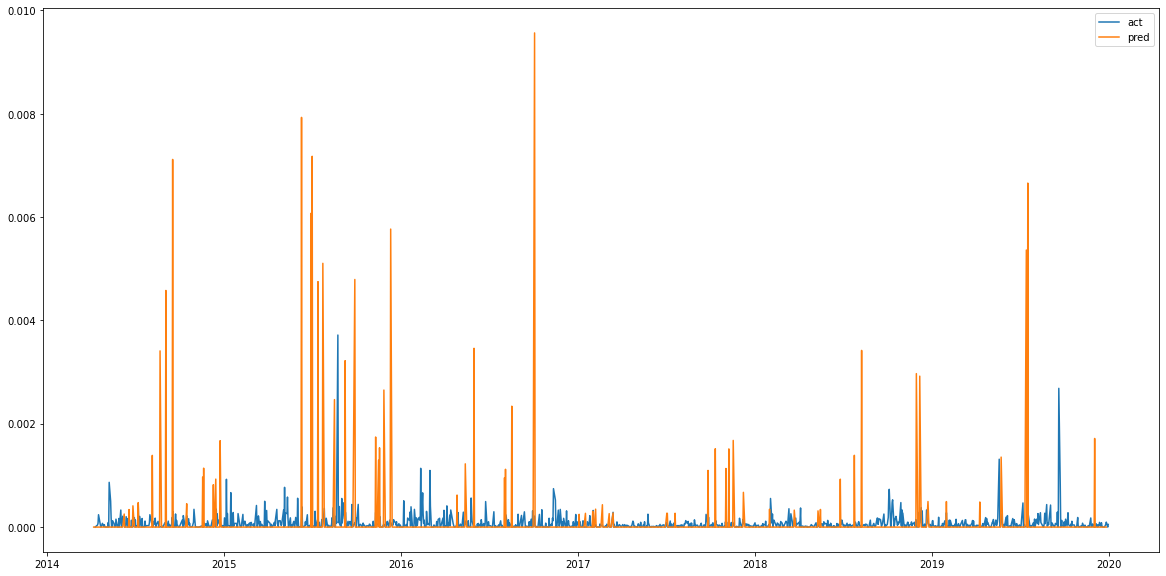

In [132]:
plt.figure(figsize=(20,10))
plt.plot(test['Volatility'], label='act')
plt.plot(t, label='pred')

plt.legend()

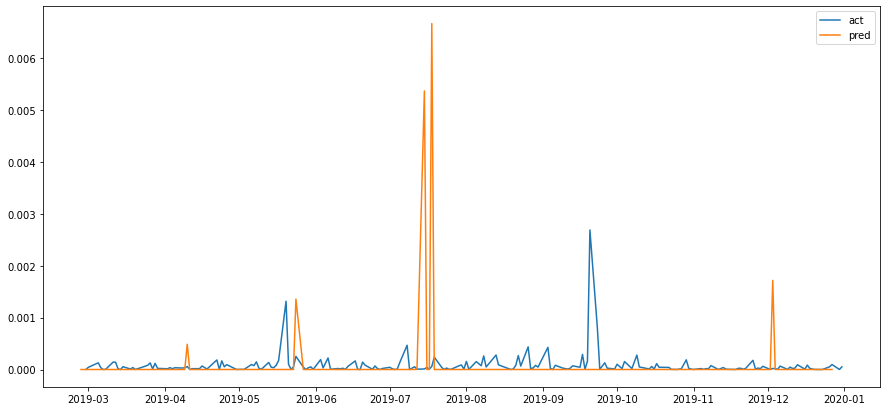

In [133]:
plt.figure(figsize=(15,7))
plt.plot(test['Volatility'].iloc[-200:], label='act')
plt.plot(t.iloc[-200:], label='pred')
plt.legend()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(test['Volatility'],t)))
print(mean_absolute_error(test['Volatility'],t))

0.0006840439300911818
0.00016762535299692807


## NIFTY Bank

In [102]:
df = pd.read_csv('NIFTY Bank.csv')

In [103]:
df=df.dropna(axis=0)

In [104]:
series = df['Volatility']
series.head()

0    0.002847
1    0.001206
2    0.001129
3    0.000820
4    0.001327
Name: Volatility, dtype: float64

In [105]:
df[df.index==int(df.shape[0]*0.8)]

,Date,Close,LN Returns,Volatility
3979,18-Dec-15,16594.3,-0.008831,0.000078


In [106]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index(["Date"])
df.head()

,Close,LN Returns,Volatility
Date,,,
2000-01-03,1054.81,0.053361,0.002847
2000-01-04,1092.08,0.034723,0.001206
2000-01-05,1055.99,-0.033605,0.001129
2000-01-06,1086.67,0.028639,0.000820
2000-01-07,1126.99,0.036432,0.001327


In [107]:
from arch import arch_model

am = arch_model(series, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(update_freq=5)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -29635.35410470725
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [108]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=4974, freq=None)

In [109]:
df[df.index>='2015-12-18']

,Close,LN Returns,Volatility
Date,,,
2015-12-18,16594.30,-0.008831,0.000078
2015-12-21,16825.15,0.013816,0.000191
2015-12-22,16749.20,-0.004524,0.000020
2015-12-23,16882.50,0.007927,0.000063
2015-12-24,16811.00,-0.004244,0.000018
...,...,...,...
2019-12-24,32280.75,-0.001817,0.000003
2019-12-26,31997.70,-0.008807,0.000078
2019-12-27,32412.35,0.012875,0.000166


In [110]:
test=df[df.index>'2015-12-18']

In [111]:
len(df) - (len(df)-len(test))

994

In [112]:
import sys

index = series.index
start_loc = 0
end_loc = 3979
forecasts = {}
for i in range(994):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

....

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


....

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


....

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned cod

limit_output extension: Maximum message size of 10000 exceeded with 10374 characters

In [113]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                23592.0
Distribution:                  Normal   AIC:                          -47176.0
Method:            Maximum Likelihood   BIC:                          -47150.8
                                        No. Observations:                 3979
Date:                Tue, Apr 28 2020   Df Residuals:                     3975
Time:                        21:56:20   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.4540e-04  3.435e-08  1.005e+04      0.000 [3.453e-04,3.455e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.1124e-08  1.831e-12  1.153e+04      0.000 [2.112e-08,2.113e-08]
alpha[1]       0.1000  2.465e-02      4.057  4.972e-05   [5.169e-02,  0.148]
beta[1]        0.8800  1.318e-02     66.746      0.000     [  0.854,  0.906]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [114]:
t=pd.DataFrame(forecasts).T
t = t.set_index(test.index)
t.shape

(994, 1)

In [115]:
test.shape

(994, 3)

In [116]:
t

,h.1
Date,
2015-12-21,2.773307e-07
2015-12-22,2.761741e-07
2015-12-23,2.696320e-07
2015-12-24,2.737279e-07
2015-12-28,2.743706e-07
...,...
2019-12-24,2.559917e-07
2019-12-26,2.581267e-07
2019-12-27,2.599710e-07


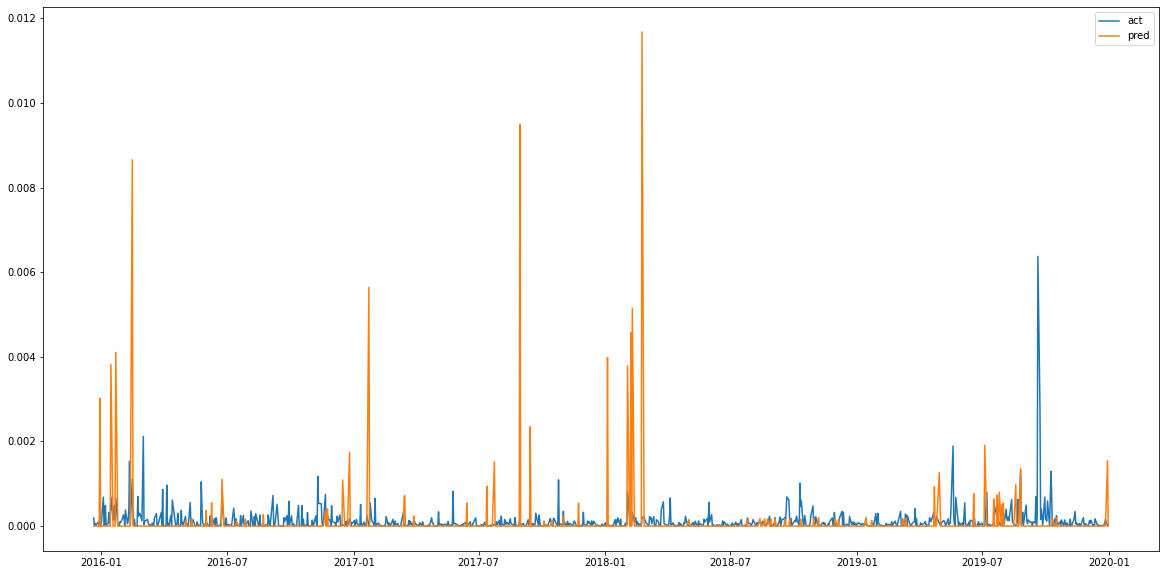

In [117]:
plt.figure(figsize=(20,10))
plt.plot(test['Volatility'], label='act')
plt.plot(t, label='pred')

plt.legend()

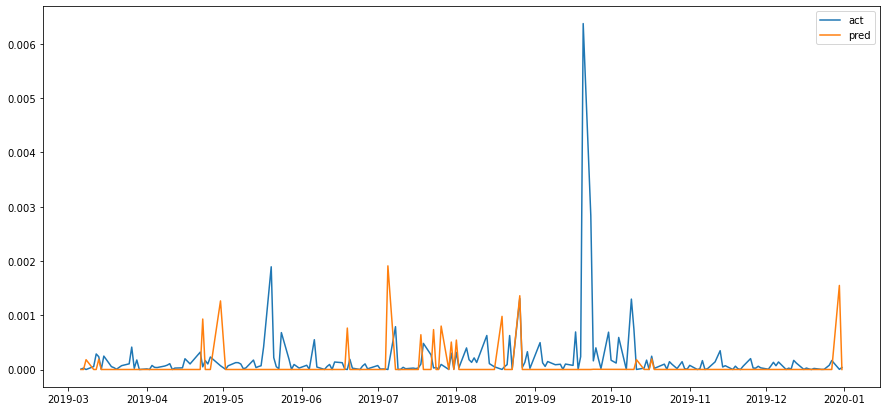

In [118]:
plt.figure(figsize=(15,7))
plt.plot(test['Volatility'].iloc[-200:], label='act')
plt.plot(t.iloc[-200:], label='pred')
plt.legend()

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(test['Volatility'],t)))
print(mean_absolute_error(test['Volatility'],t))

0.0007282664572473054
0.0001911243155946697


## NIFTY FMCG

In [81]:
df = pd.read_csv('NIFTY FMCG.csv')

In [82]:
df=df.dropna(axis=0)

In [83]:
series = df['Volatility']
series.head()

0    4.762780e-06
1    4.140460e-05
2    3.662360e-09
3    2.883710e-05
4    1.139260e-04
Name: Volatility, dtype: float64

In [84]:
df[df.index==int(df.shape[0]*0.8)]

,Date,Close,LN Returns,Volatility
4776,27-Feb-15,22063.95,-0.000315,9.918970e-08


In [85]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index(["Date"])
df.head()

,Close,LN Returns,Volatility
Date,,,
1996-01-02,997.82,-0.002182,4.762780e-06
1996-01-03,991.42,-0.006435,4.140460e-05
1996-01-04,991.48,0.000061,3.662360e-09
1996-01-05,986.17,-0.005370,2.883710e-05
1996-01-08,975.70,-0.010674,1.139260e-04


In [86]:
from arch import arch_model

am = arch_model(series, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(update_freq=5)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -38005.33044147445
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [87]:
df.index

DatetimeIndex(['1996-01-02', '1996-01-03', '1996-01-04', '1996-01-05',
               '1996-01-08', '1996-01-09', '1996-01-10', '1996-01-11',
               '1996-01-12', '1996-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=5971, freq=None)

In [88]:
df[df.index>='2015-02-27']

,Close,LN Returns,Volatility
Date,,,
2015-02-27,22063.95,-0.000315,9.918970e-08
2015-02-28,21102.35,-0.044561,1.985651e-03
2015-03-02,20648.65,-0.021734,4.723870e-04
2015-03-03,20661.40,0.000617,3.810380e-07
2015-03-04,20743.40,0.003961,1.568870e-05
...,...,...,...
2019-12-24,30197.55,-0.000675,4.560610e-07
2019-12-26,30063.55,-0.004447,1.977870e-05
2019-12-27,30145.45,0.002721,7.401260e-06


In [89]:
test=df[df.index>'2015-02-27']

In [90]:
len(df) - (len(df)-len(test))

1194

In [91]:
import sys

index = series.index
start_loc = 0
end_loc = 4776
forecasts = {}
for i in range(1194):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


....

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


....

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


..

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


...

C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\VISHY\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned cod

limit_output extension: Maximum message size of 10000 exceeded with 10128 characters

In [92]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                31532.3
Distribution:                  Normal   AIC:                          -63056.6
Method:            Maximum Likelihood   BIC:                          -63030.7
                                        No. Observations:                 4776
Date:                Tue, Apr 28 2020   Df Residuals:                     4772
Time:                        21:53:21   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.6198e-04  1.273e-07   1272.468      0.000 [1.617e-04,1.622e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.7704e-09  5.103e-12    738.821      0.000 [3.760e-09,3.780e-09]
alpha[1]       0.2000  5.866e-02      3.409  6.510e-04   [8.503e-02,  0.315]
beta[1]        0.7800  3.486e-02     22.375 6.890e-111     [  0.712,  0.848]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [93]:
t=pd.DataFrame(forecasts).T
t = t.set_index(test.index)
t.shape

(1194, 1)

In [94]:
test.shape

(1194, 3)

In [95]:
t

,h.1
Date,
2015-02-28,7.264214e-08
2015-03-02,7.543775e-08
2015-03-03,4.634501e-04
2015-03-04,3.496342e-07
2015-03-05,3.192150e-07
...,...
2019-12-24,3.516868e-08
2019-12-26,3.504857e-08
2019-12-27,3.633215e-08


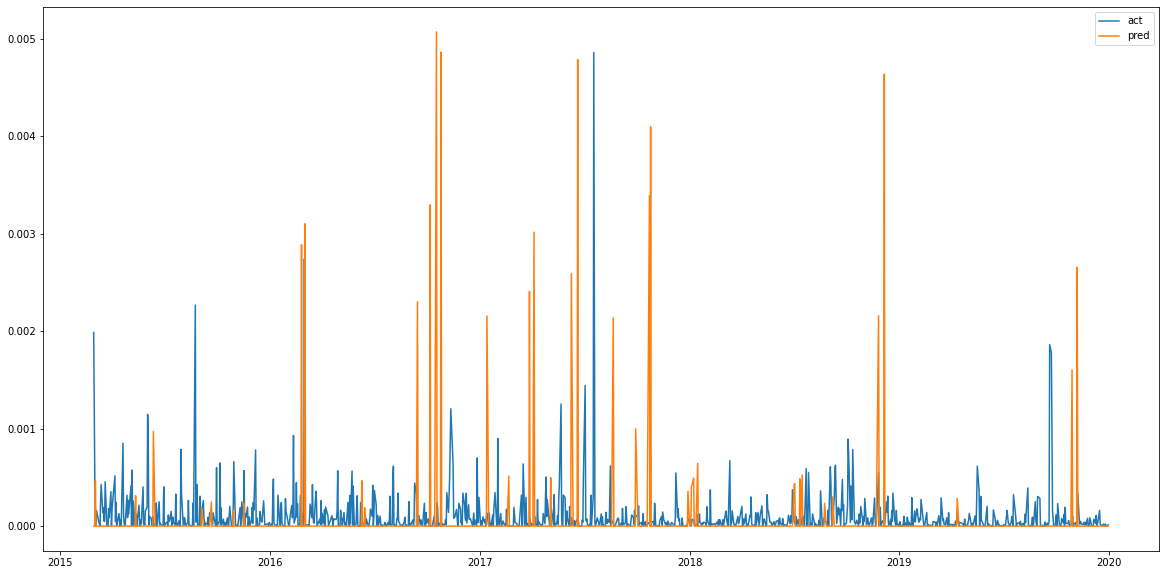

In [98]:
plt.figure(figsize=(20,10))
plt.plot(test['Volatility'], label='act')
plt.plot(t, label='pred')

plt.legend()

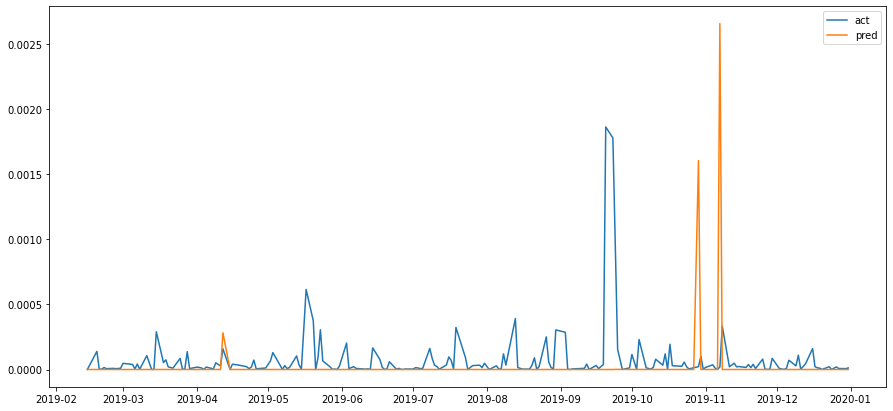

In [101]:
plt.figure(figsize=(15,7))
plt.plot(test['Volatility'].iloc[-200:], label='act')
plt.plot(t.iloc[-200:], label='pred')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(test['Volatility'],t)))
print(mean_absolute_error(test['Volatility'],t))